<a href="https://colab.research.google.com/github/aryatomarAI/Natural-Language-Processing-with-python/blob/main/Deep-Learning-(-NLP-Project-)/Chat_Bots_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question and Answer Chat Bots
In this Project we will Build Q&A Chat bots which will study a story and when asked a question will reply in Yes or No according to the situation in the story.

## Data
We will use BaBi dataset of facebook for this project

Full Details: https://research.fb.com/downloads/babi/

## Algorithm 
We will use End-to-End Memory Networks for this project

Full Details: https://arxiv.org/abs/1503.08895

## Now let's load the data and import all the tools needed

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pickle

### load the training data 

In [3]:
with open("drive/MyDrive/train_qa.txt","rb") as f:
    train_data=pickle.load(f)

In [4]:
train_data[:6]

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

### load the testing data

In [5]:
with open("drive/MyDrive/test_qa.txt","rb") as f:
    test_data=pickle.load(f)

In [6]:
test_data[:6]

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [7]:
len(train_data)

10000

In [8]:
len(test_data)

1000

## Now let's try to grab the story part, question part and answer part from the data

In [9]:
train_data[0]  # This is the first item of the list

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [10]:
train_data[0][0]   # This the story part of the first item

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [11]:
" ".join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [12]:
train_data[0][1]   # This is the question part of the first item

['Is', 'Sandra', 'in', 'the', 'hallway', '?']

In [13]:
" ".join(train_data[0][1])

'Is Sandra in the hallway ?'

In [14]:
train_data[0][2]  # This the answer part of the first item

'no'

**Note-** We have only to outcomes as an answer it's either yes or no

### Setting Up Vocabulary of All words

In [15]:
vocab=set()
all_data=train_data + test_data
len(all_data)

11000

In [16]:
for story,ques,ans in all_data: # As each element is sub divided into three section story,question and answer
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(ques))
vocab.add('no')
vocab.add("yes")
len(vocab)

37

In [17]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

### So we have found an vocabulary of 37 words 

In [18]:
vocab_len=len(vocab) +1  # we add 1 to provide an extra space to hold a 0 for keras pad_sequences

In [19]:
max_story_len=max([len(data[0]) for data in all_data])

In [20]:
max_story_len  # So maximum length of a story is 156

156

In [21]:
max_question_len=max([len(data[1]) for data in all_data])
max_question_len    # So maximum length of a question can be 6

6

### Vectorizing the data

In [22]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [23]:
# Create a tokenizer object
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)
tokenizer.word_index

{'.': 28,
 '?': 17,
 'apple': 10,
 'back': 24,
 'bathroom': 22,
 'bedroom': 30,
 'daniel': 26,
 'discarded': 20,
 'down': 6,
 'dropped': 19,
 'football': 11,
 'garden': 4,
 'got': 23,
 'grabbed': 8,
 'hallway': 37,
 'in': 13,
 'is': 35,
 'john': 14,
 'journeyed': 7,
 'kitchen': 15,
 'left': 27,
 'mary': 33,
 'milk': 21,
 'moved': 25,
 'no': 29,
 'office': 16,
 'picked': 3,
 'put': 2,
 'sandra': 34,
 'the': 18,
 'there': 32,
 'to': 31,
 'took': 12,
 'travelled': 36,
 'up': 5,
 'went': 9,
 'yes': 1}

In [24]:
train_story_text=[]
train_ques_text=[]
train_ans_text=[]

for story,ques,ans in test_data:
    train_story_text.append(story)
    train_ques_text.append(ques)
    train_ans_text.append(ans)

In [25]:
train_story_text[:2]

[['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'discarded',
  'the',
  'milk',
  '.',
  'John',
  'went',
  'to',
  'the',
  'garden',
  '.']]

In [26]:
## Let's create a function now for the above functionality
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
    # X=stories
    X=[]
    
    # Xq=Question/Query
    Xq=[]
    
    # Y=Correct Answers
    Y=[]
    
    for story,ques,ans in data:
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in ques]
        y=np.zeros(len(word_index) +1)
        y[word_index[ans]]=1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [27]:
input_train,ques_train,ans_train=vectorize_stories(train_data)

In [28]:
input_train[:3]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        33, 25, 31, 18, 22, 28, 34,  7, 31, 18, 30, 28],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       

In [29]:
ques_train[:3]

array([[35, 34, 13, 18, 37, 17],
       [35, 26, 13, 18, 22, 17],
       [35, 26, 13, 18, 16, 17]], dtype=int32)

In [30]:
ans_train[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [31]:
tokenizer.word_index["no"]

29

In [32]:
sum(ans_train)

array([   0., 5012.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0., 4988.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.])

In [33]:
input_test,ques_test,ans_test=vectorize_stories(test_data)

In [34]:
input_test.shape

(1000, 156)

In [35]:
input_train.shape

(10000, 156)

## Creating the Model

In [36]:
#import all the tools 
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import add,dot,concatenate
from keras.layers import Activation,Permute,Dense,Dropout,Input
from keras.layers import LSTM


**Placeholders for inputs**

In [37]:
input_sequence=Input((max_story_len,))
question=Input((max_question_len,))

### Building the Networks

### Encoders
Input get embedded to a sequence of vectors

**Input Encoder m**

In [38]:
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.35))
# (samples,max_story_len,embedding_dim)

### Input Encoder c

In [39]:
# Embed the input into a sequence of vectors of sixe_query_maxlen
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.35))
# (samples,story_max_len,question_maxLen)

### Question Encoder

In [40]:
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.35))
# (samples,question_len,embedding_dim)

### Encode Sequences

In [41]:
# Encode input sequences and questions
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

In [42]:
# Shape: (samples,story_max_len,question_max_len)
match=dot([input_encoded_m,question_encoded],axes=(2,2))

In [43]:
input_encoded_m.shape

TensorShape([None, 156, 64])

In [44]:
question_encoded.shape

TensorShape([None, 6, 64])

In [45]:
match.shape

TensorShape([None, 156, 6])

In [46]:
match=Activation("softmax")(match)

In [47]:
# add the matrix with second input vector sequence
response=add([match,input_encoded_c])

In [48]:
#We will permute to alter response dimensions
response=Permute((2,1))(response)

In [49]:
response.shape

TensorShape([None, 6, 156])

### Concatenate

In [50]:
# Concatenate the match matrix with question vector sequence
answer=concatenate([response,question_encoded])

In [51]:
answer.shape

TensorShape([None, 6, 220])

### Reduce with RNN(LSTM)

In [52]:
answer=LSTM(64)(answer)

In [53]:
answer.shape

TensorShape([None, 64])

In [54]:
#Regularization with dropout
answer=Dropout(0.35)(answer)

answer=Dense(vocab_len)(answer)

In [55]:
answer=Activation("softmax")(answer)

In [56]:
answer.shape

TensorShape([None, 38])

### Build the final model

In [57]:
model=Model([input_sequence,question],answer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

## Train the Model

In [58]:
history=model.fit([input_train,ques_train],ans_train,batch_size=32,epochs=100,validation_data=([input_test,ques_test],ans_test))

Epoch 1/100
313/313 [==============================] - 11s 13ms/step - loss: 0.8497 - accuracy: 0.4954 - val_loss: 0.6963 - val_accuracy: 0.5030
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 0.7074 - accuracy: 0.5079 - val_loss: 0.6945 - val_accuracy: 0.5030
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.7000 - accuracy: 0.5017 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6982 - accuracy: 0.5006 - val_loss: 0.6991 - val_accuracy: 0.4970
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6973 - accuracy: 0.4970 - val_loss: 0.6937 - val_accuracy: 0.5030
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6965 - accuracy: 0.4970 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6958 - accuracy: 0.5041 - val_loss: 0.6944 - val_accuracy

### Saving The Model

In [59]:
filename=("drive/MyDrive/Model/chotbots_model_100_adam1.h5")
model.save(filename)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Evaluating the model

### Plotting out training history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


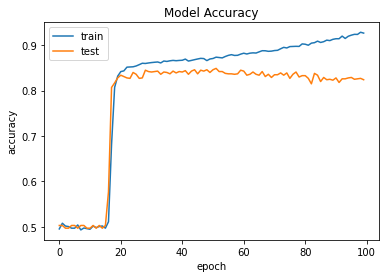

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel('accuracy')
plt.title("Model Accuracy")
plt.legend(["train","test"],loc='upper left')
plt.show()

## Load The saved model

In [61]:
from keras.models import load_model
my_model=load_model("drive/MyDrive/Model/chotbots_model_100_adam1.h5")

## Evaluating the model on the given test data set

In [63]:
test_data[:6]

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [64]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [65]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

### Original Answer

In [66]:
test_data[0][2]

'no'

### Make prediction on Test data

In [67]:
predictions=my_model.predict(([input_test,ques_test]))

In [68]:
predictions[0]

array([7.4828728e-16, 1.6346449e-06, 7.4468230e-16, 8.3258691e-16,
       5.9553616e-16, 7.2244292e-16, 5.9836673e-16, 6.0890123e-16,
       6.1621980e-16, 7.4553495e-16, 5.3738211e-16, 5.8541157e-16,
       5.5189559e-16, 5.9605439e-16, 6.1006839e-16, 6.6770713e-16,
       6.3258490e-16, 6.0896396e-16, 6.0433789e-16, 5.9262178e-16,
       6.4429672e-16, 7.2664124e-16, 5.8598131e-16, 7.6850278e-16,
       5.6912800e-16, 4.7569476e-16, 5.6974057e-16, 7.3492353e-16,
       5.5537822e-16, 9.9999833e-01, 5.3405110e-16, 6.1861738e-16,
       5.0560625e-16, 5.1045895e-16, 1.0113654e-15, 6.3377816e-16,
       9.2172664e-16, 4.3190247e-16], dtype=float32)

In [73]:
val_max=np.argmax(predictions[0])

### Predicted Answer

In [75]:
for key, val in tokenizer.word_index.items():
  if val==val_max:
    k=key
print(k)

no


### Probability of certainty

In [76]:
predictions[0][val_max]   

0.99999833

<font color="green">So our model is 99.99 % Sure that answer is no

## Predicting on your own stories and questions

**Note:** Remember that you can only use the words that are present in the vocabulary

In [77]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [152]:
story="Daniel is in the bathroom . John is in the garden . Mary is in the hallway ."

In [153]:
story.split()

['Daniel',
 'is',
 'in',
 'the',
 'bathroom',
 '.',
 'John',
 'is',
 'in',
 'the',
 'garden',
 '.',
 'Mary',
 'is',
 'in',
 'the',
 'hallway',
 '.']

In [166]:
question="Is Mary in the hallway ?"
question.split()

['Is', 'Mary', 'in', 'the', 'hallway', '?']

In [167]:
my_data=[(story.split(),question.split(),'no')]
my_story,my_ques,my_ans=vectorize_stories(my_data)

In [168]:
my_pred=my_model.predict(([my_story,my_ques]))

In [169]:
max_val=np.argmax(my_pred)

for key,val in tokenizer.word_index.items():
  if val==val_max:
    k=key

print("The answer is: ",k)
print("Certainity",my_pred[0][max_val])

The answer is:  yes
Certainity 0.9242814


### Try another on another story and question

In [172]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [173]:
my_question = "Is the football in the kitchen ?"

In [174]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [175]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [176]:
pred_results = my_model.predict(([ my_story, my_ques]))

In [177]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9999703
